## Project Overview

This project identifies patterns and trends in air pollution levels, by analyzing the air quality data over a period of time. This can help us to understand the causes of air pollution and take necessary measures to reduce it. 

The dataset description is as follows:
   
   The dataset contains 9357 instances of hourly averaged responses (recorded from March 2004 to February 2005 ) from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device, located within an Italian city.  Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value.
   
   The dataset includes measurements of several air pollutants, including CO, NMHC, benzene, NOx, and NO2, as well as measurements of various gas sensors. It also includes measurements of temperature, relative humidity, and absolute humidity.

Attribute Information

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity


### Import Libraries and Load Data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Setup the default format for displaying output
pd.options.display.max_rows = 20
pd.options.display.float_format = "{:.3f}".format

In [2]:
# Load Data

df = pd.read_csv(r'...\AirQualityUCI\AirQualityUCI.csv',sep = ';')



### Data Visualization and Exploration

In [3]:
df.head(5)

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6     1360.000   150.000     11,9       1046.000   
1  10/03/2004  19.00.00      2     1292.000   112.000      9,4        955.000   
2  10/03/2004  20.00.00    2,2     1402.000    88.000      9,0        939.000   
3  10/03/2004  21.00.00    2,2     1376.000    80.000      9,2        948.000   
4  10/03/2004  22.00.00    1,6     1272.000    51.000      6,5        836.000   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0  166.000      1056.000  113.000      1692.000     1268.000  13,6  48,9   
1  103.000      1174.000   92.000      1559.000      972.000  13,3  47,7   
2  131.000      1140.000  114.000      1555.000     1074.000  11,9  54,0   
3  172.000      1092.000  122.000      1584.000     1203.000  11,0  60,0   
4  131.000      1205.000  116.000      1490.000     1110.000  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

#### Looking at the data at high level, we could see some issues:
    * Decimal points have been replaced with commas
    * Last two columns are Unnamed

In [4]:
# Take necessary actions

df.replace(to_replace = ',',value = '.', regex=True, inplace = True)

df.drop(['Unnamed: 15', 'Unnamed: 16'], inplace = True, axis = 1)

In [5]:
# Rearrange the columns for better understanding

cols = df.columns.tolist()
cols = cols[:2]+cols[12:15]+[cols[3]]+[cols[2]]+[cols[6]]+[cols[4]]+[cols[8]]+[cols[7]]+[cols[10]]+[cols[9]]+[cols[11]]+[cols[5]]

df = df[cols]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   T              9357 non-null   object 
 3   RH             9357 non-null   object 
 4   AH             9357 non-null   object 
 5   PT08.S1(CO)    9357 non-null   float64
 6   CO(GT)         9357 non-null   object 
 7   PT08.S2(NMHC)  9357 non-null   float64
 8   NMHC(GT)       9357 non-null   float64
 9   PT08.S3(NOx)   9357 non-null   float64
 10  NOx(GT)        9357 non-null   float64
 11  PT08.S4(NO2)   9357 non-null   float64
 12  NO2(GT)        9357 non-null   float64
 13  PT08.S5(O3)    9357 non-null   float64
 14  C6H6(GT)       9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [7]:
df.describe()

PT08.S1(CO)  PT08.S2(NMHC)  NMHC(GT)  PT08.S3(NOx)  NOx(GT)  \
count     9357.000       9357.000  9357.000      9357.000 9357.000   
mean      1048.990        894.595  -159.090       794.990  168.617   
std        329.833        342.333   139.789       321.994  257.434   
min       -200.000       -200.000  -200.000      -200.000 -200.000   
25%        921.000        711.000  -200.000       637.000   50.000   
50%       1053.000        895.000  -200.000       794.000  141.000   
75%       1221.000       1105.000  -200.000       960.000  284.000   
max       2040.000       2214.000  1189.000      2683.000 1479.000   

       PT08.S4(NO2)  NO2(GT)  PT08.S5(O3)  
count      9357.000 9357.000     9357.000  
mean       1391.480   58.149      975.072  
std         467.210  126.940      456.938  
min        -200.000 -200.000     -200.000  
25%        1185.000   53.000      700.000  
50%        1446.000   96.000      942.000  
75%        1662.000  133.000     1255.000  
max        2775.000  340.000     2523.000

In [8]:
# Convert objects into appropriate dtype

selected = ['CO(GT)','C6H6(GT)','T','RH','AH']

for i in selected:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')

df['Time'] = pd.to_datetime(df['Time'],format = '%H.%M.%S')

 #### Looking at the data at high level, we could see some issues:
 
 * There are many missing values
 * Many values in NMHC(GT) might be missing values( tagged with -200 since all the quartiles have -200) 
 * There are outliers since there is a significant difference between max and 75% percentile.


In [9]:


df.replace(to_replace=-200,value = np.nan, inplace = True)



In [10]:
df.isnull().sum()

Date              114
Time              114
T                 480
RH                480
AH                480
PT08.S1(CO)       480
CO(GT)           1797
PT08.S2(NMHC)     480
NMHC(GT)         8557
PT08.S3(NOx)      480
NOx(GT)          1753
PT08.S4(NO2)      480
NO2(GT)          1756
PT08.S5(O3)       480
C6H6(GT)          480
dtype: int64

#### <span style='color:red' >Remove NMHC as it has many null values

In [11]:
df.drop(['NMHC(GT)'],inplace=True,axis=1)

#### Data Visualization

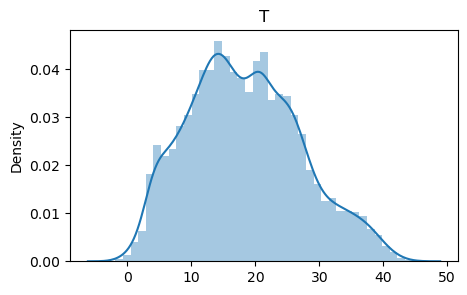

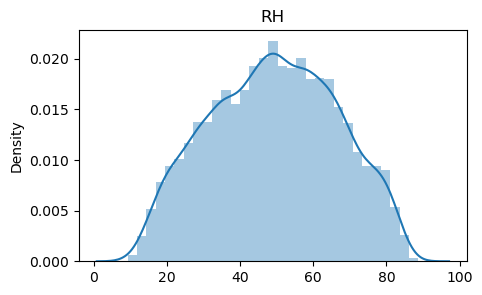

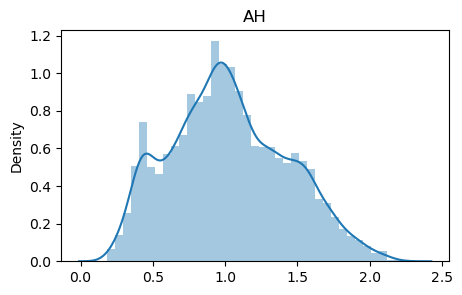

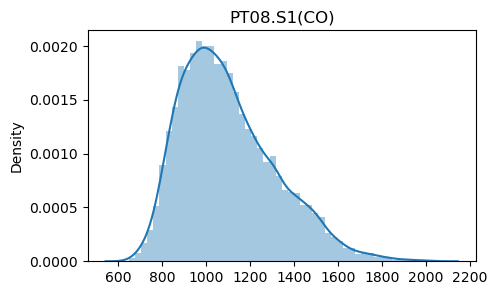

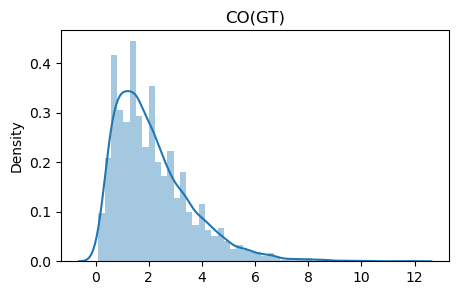

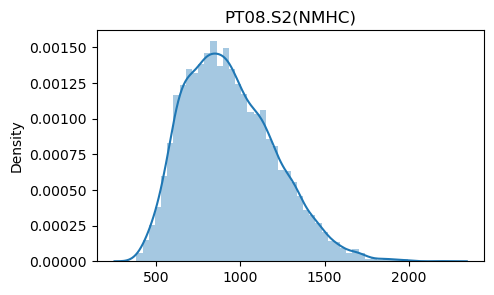

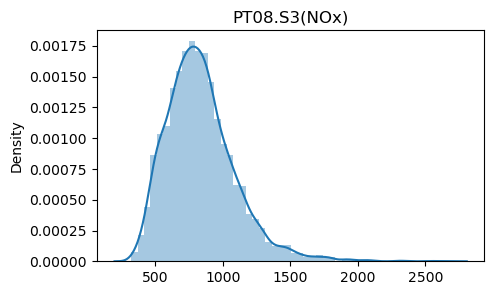

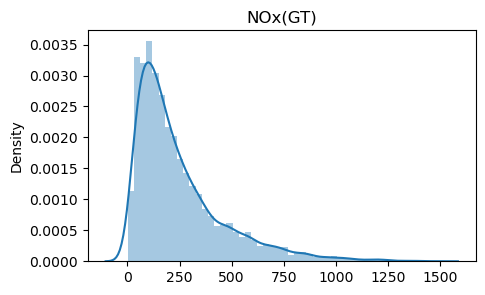

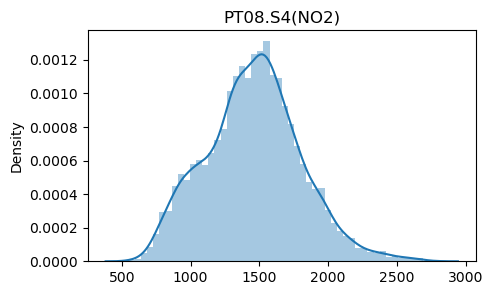

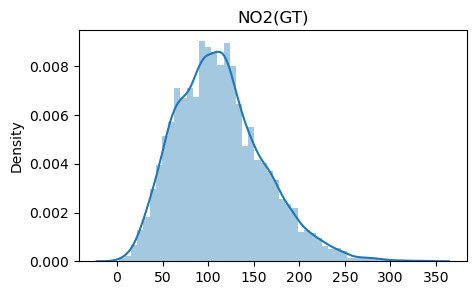

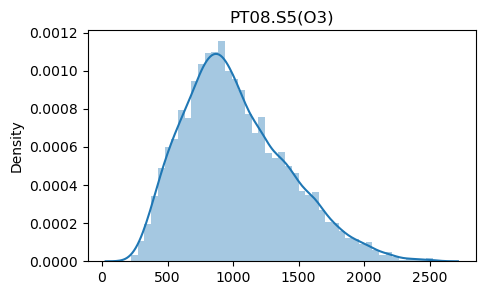

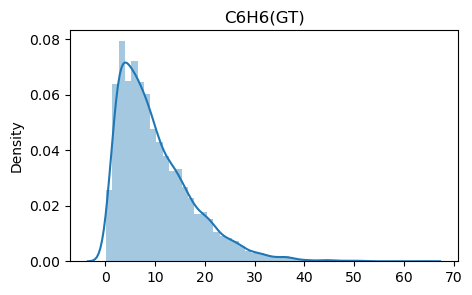

In [12]:
selected_columns = df.select_dtypes(include = [np.number]).columns

for col in selected_columns:
    plt.figure(figsize=(5,3))
    sns.distplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

#### <span style=color:red>Interpretation:  There are many outliers. 

    

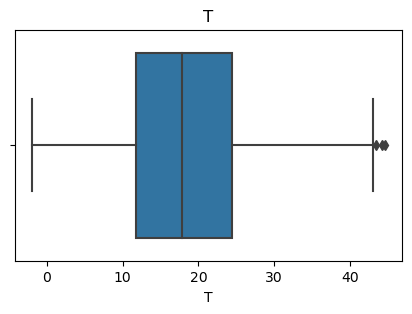

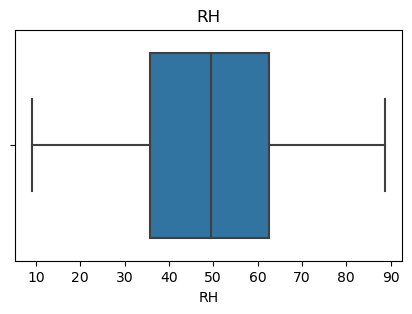

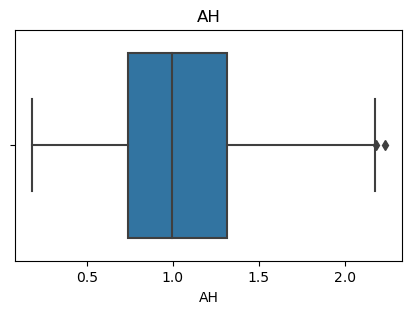

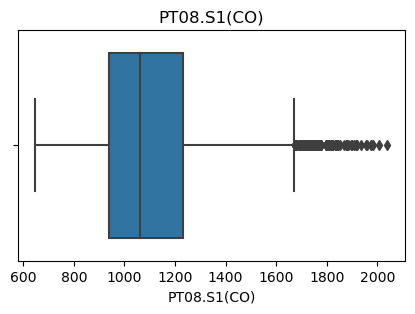

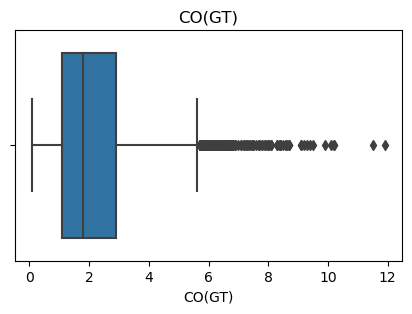

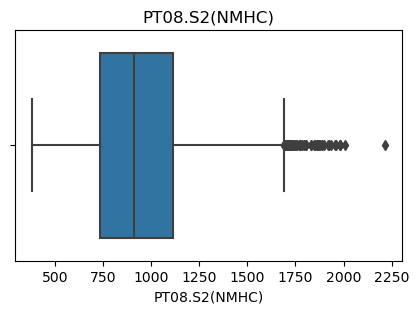

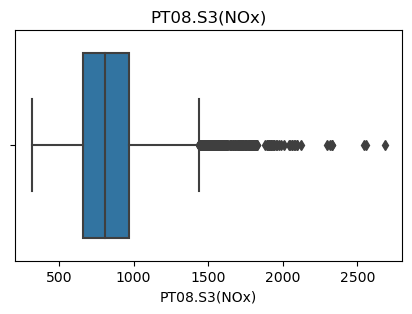

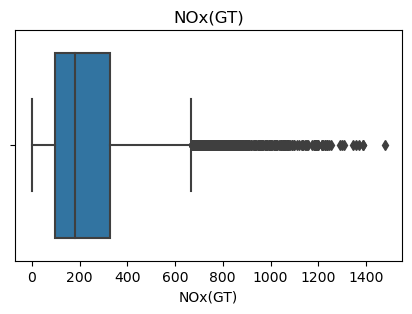

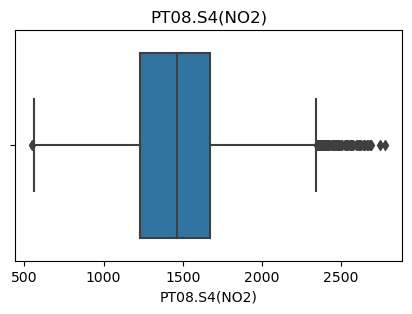

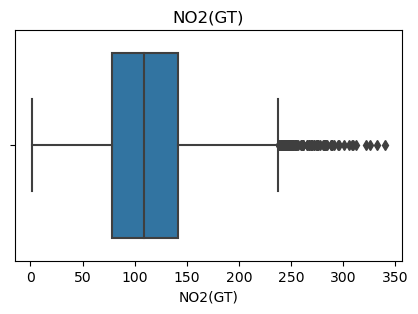

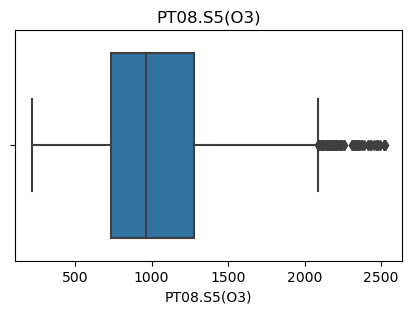

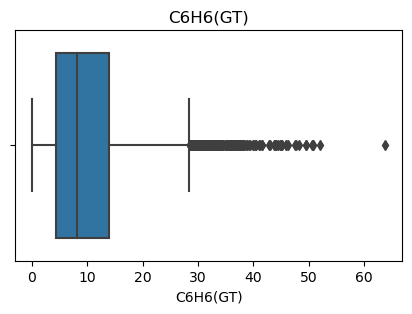

In [13]:
# Checking for outliers

selected_columns = df.select_dtypes(include = [np.number]).columns

for col in selected_columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()
    

In [14]:
# Creating new column indicating week day or not
df['weekday'] = pd.to_datetime(df['Date']).dt.day_name()
df['weekday']= df['weekday'].apply(lambda weekday:'weekday' if weekday != ('Sunday' or 'Saturday') else 'weekend')

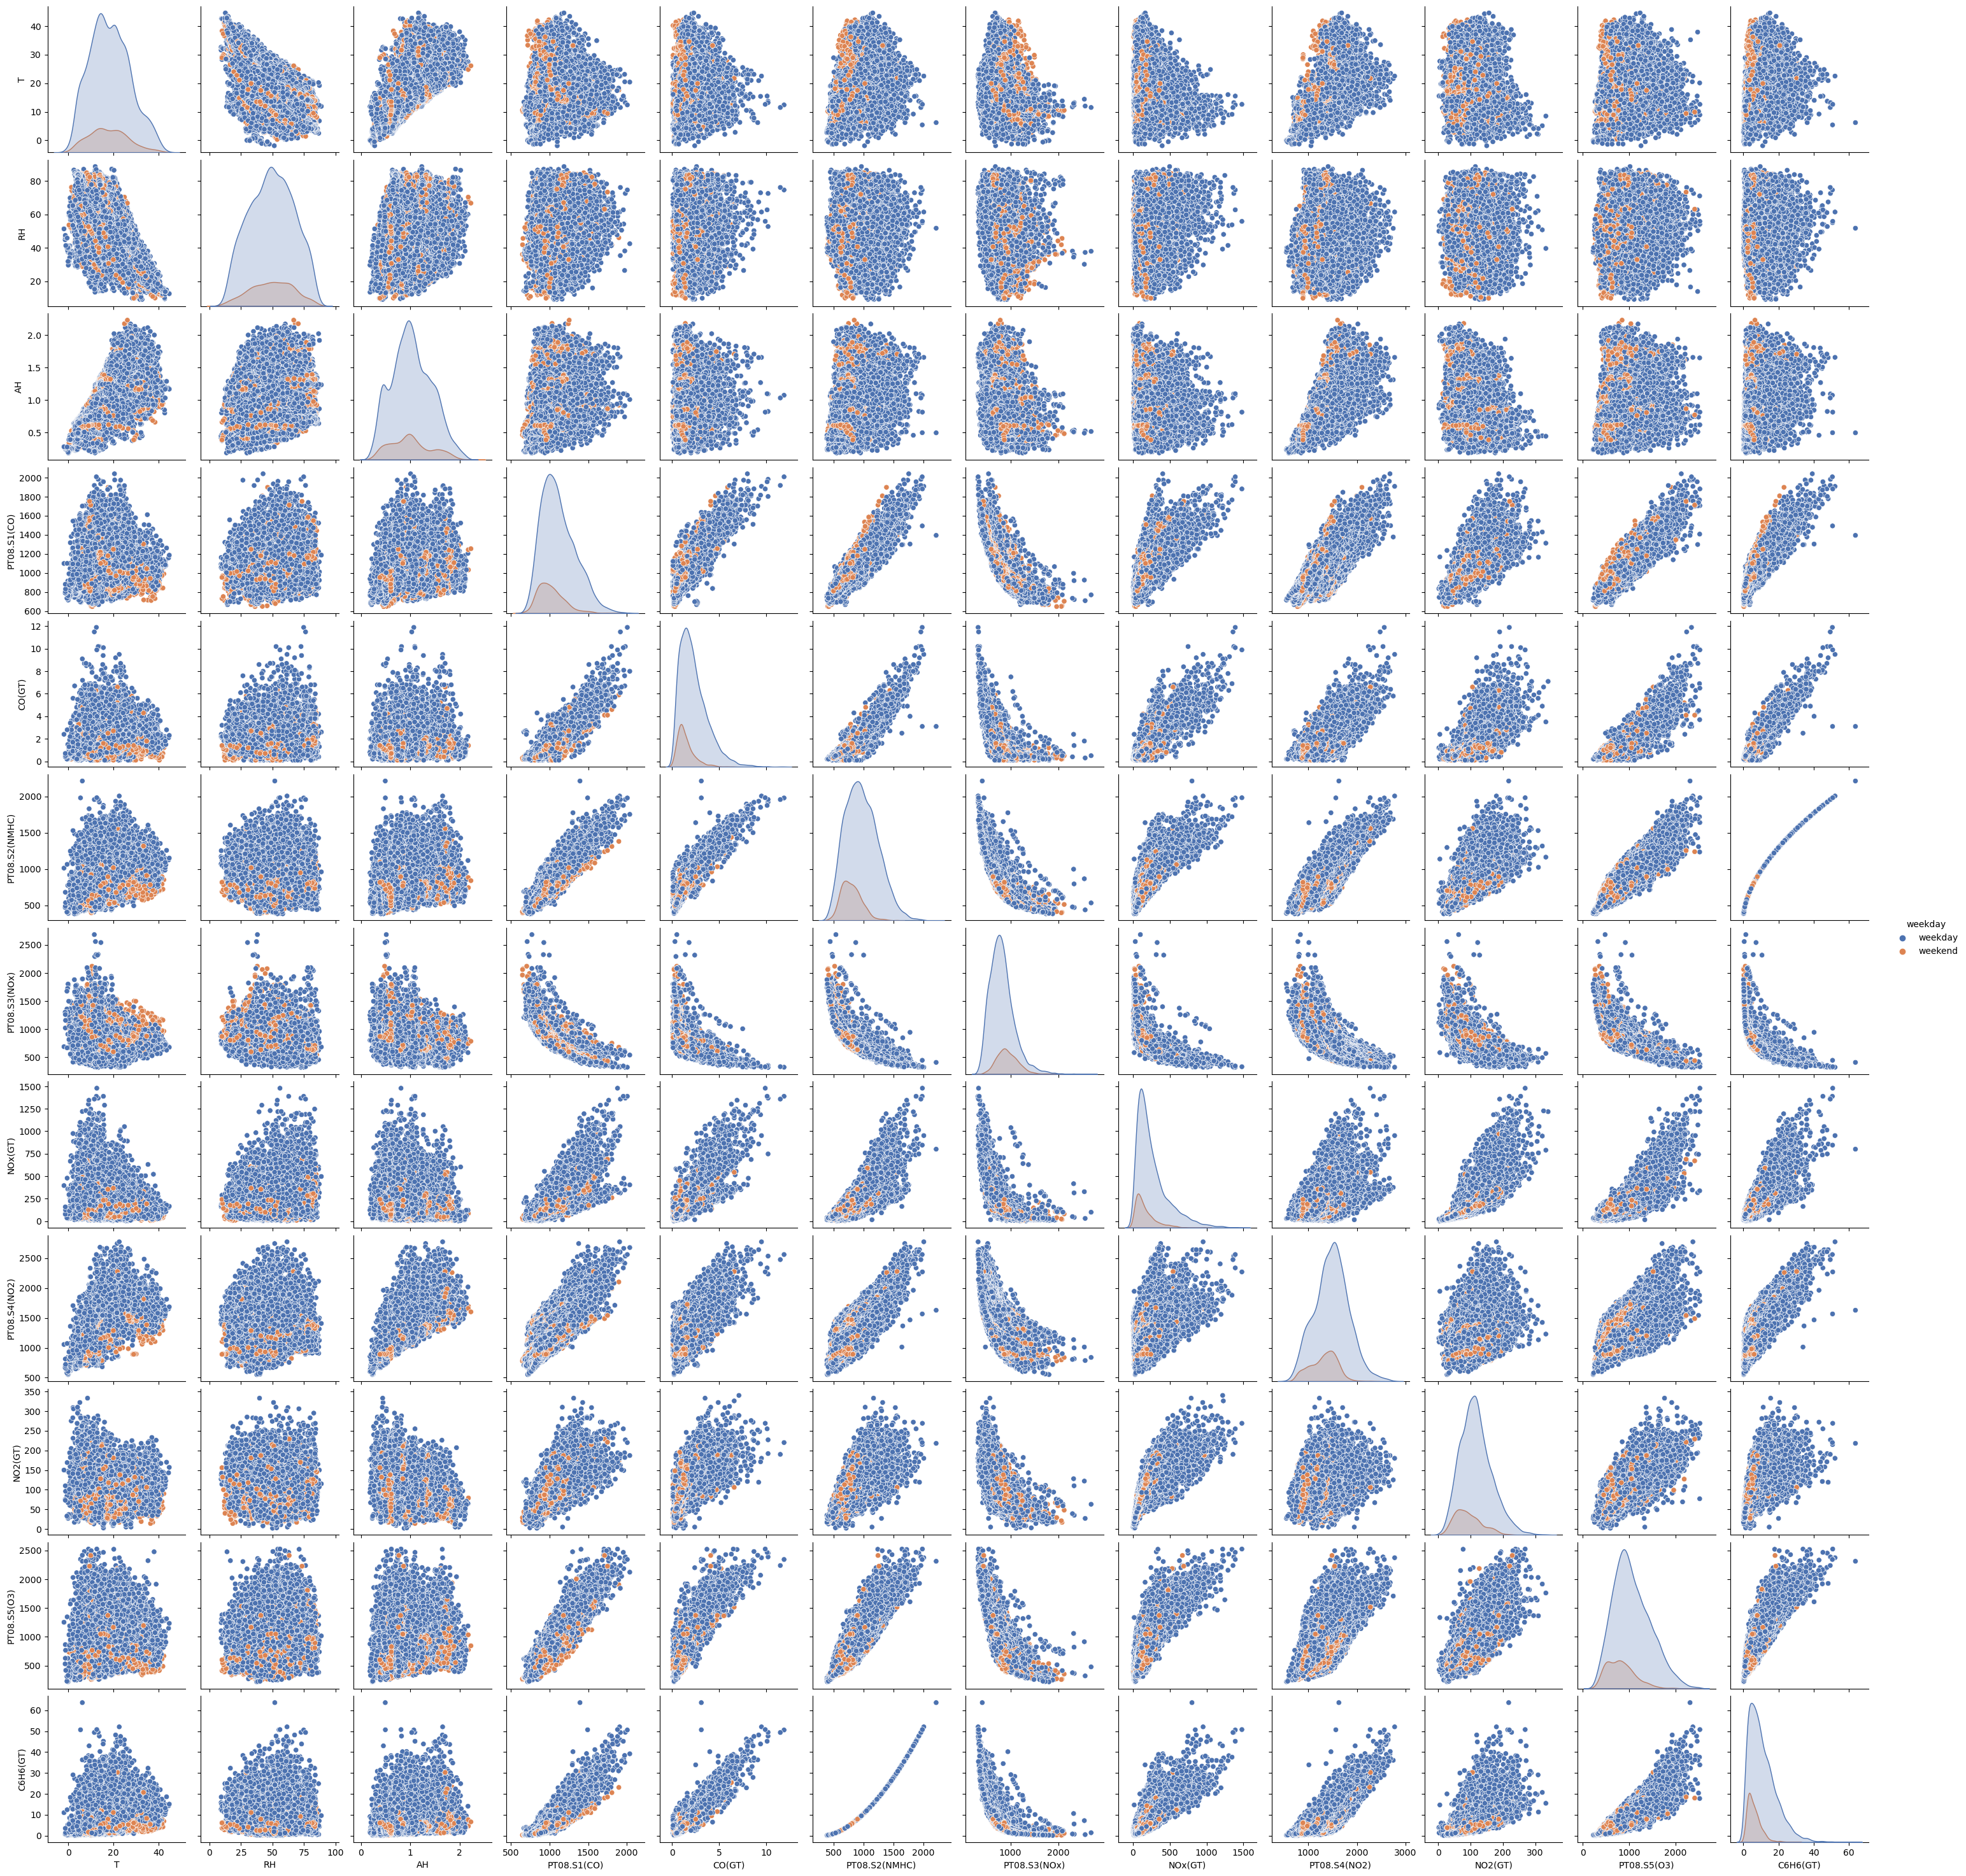

In [15]:
sns.pairplot(df, diag_kind = 'kde',hue='weekday',palette='deep')

#### Insights:
- C6H6(GT) and PT08.S2(NMHC) are highly correlated. and we can remove one of them.
- Pollution during weekdays is more than weekends


In [16]:
df.drop('C6H6(GT)',axis=1,inplace=True)

In [18]:
df['Time of Day'] = pd.cut(df['Time'].dt.hour, 
                           bins=[0, 6, 12, 18, 24], 
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'])
                           

In [19]:
df['Time'] = df['Time'].dt.time

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   T              8991 non-null   float64       
 3   RH             8991 non-null   float64       
 4   AH             8991 non-null   float64       
 5   PT08.S1(CO)    8991 non-null   float64       
 6   CO(GT)         7674 non-null   float64       
 7   PT08.S2(NMHC)  8991 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NOx(GT)        7718 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  NO2(GT)        7715 non-null   float64       
 12  PT08.S5(O3)    8991 non-null   float64       
 13  weekday        9471 non-null   object        
 14  Time of Day    8967 non-null   category      
dtypes: category(1), datet

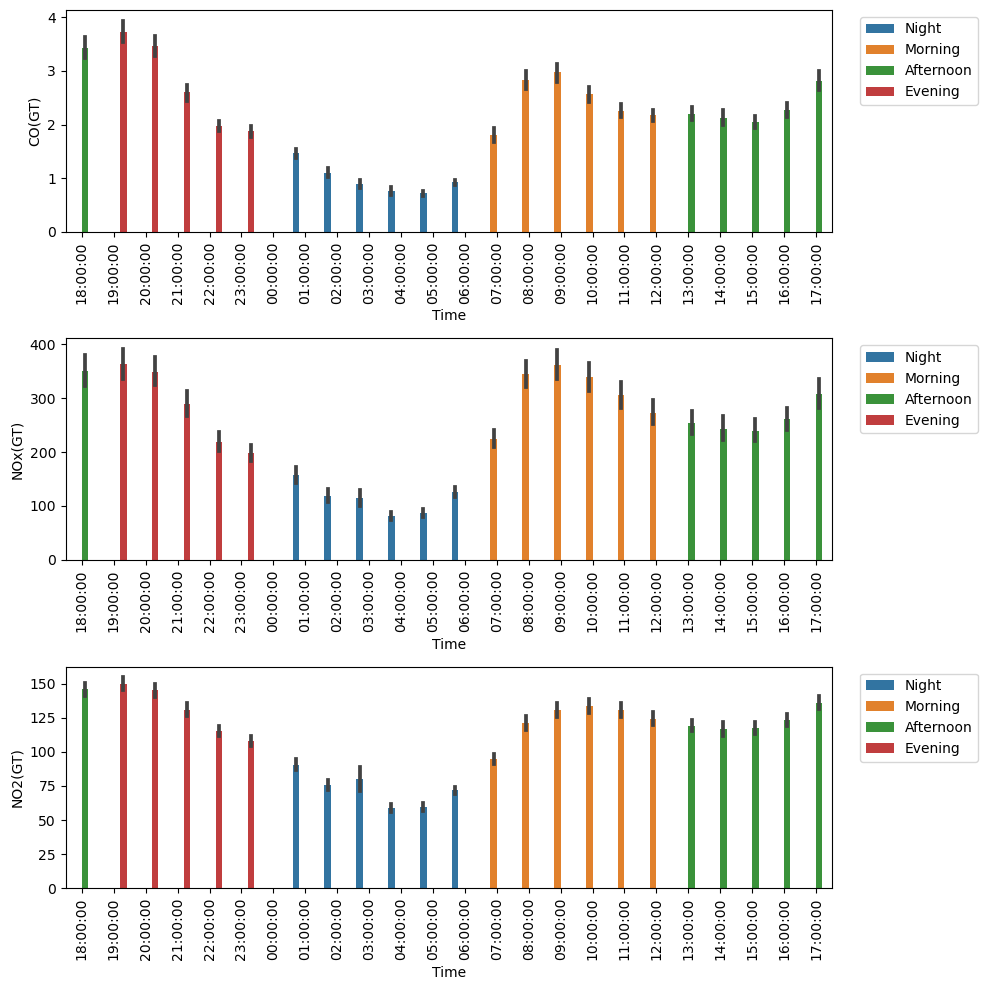

In [21]:
# time_group.plot(x = df['weekday'], y = df['Time'], kind='bar',figsize=(15,7))
GT = ['CO(GT)','NOx(GT)','NO2(GT)']
sen = ['PT08.S1(CO)','PT08.S3(NOx)','PT08.S4(NO2)']
fig, ax = plt.subplots(3,1,figsize=(10,10))
# hue_order = ['Morning','Afternoon','Evening','Night']
for var1,subplot in zip(GT,ax.flatten()):
    sns.barplot(x='Time', y=var1,data = df, ax=subplot,hue='Time of Day')
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90) # rotate xtick labels
    subplot.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) 
fig.tight_layout()
plt.show()

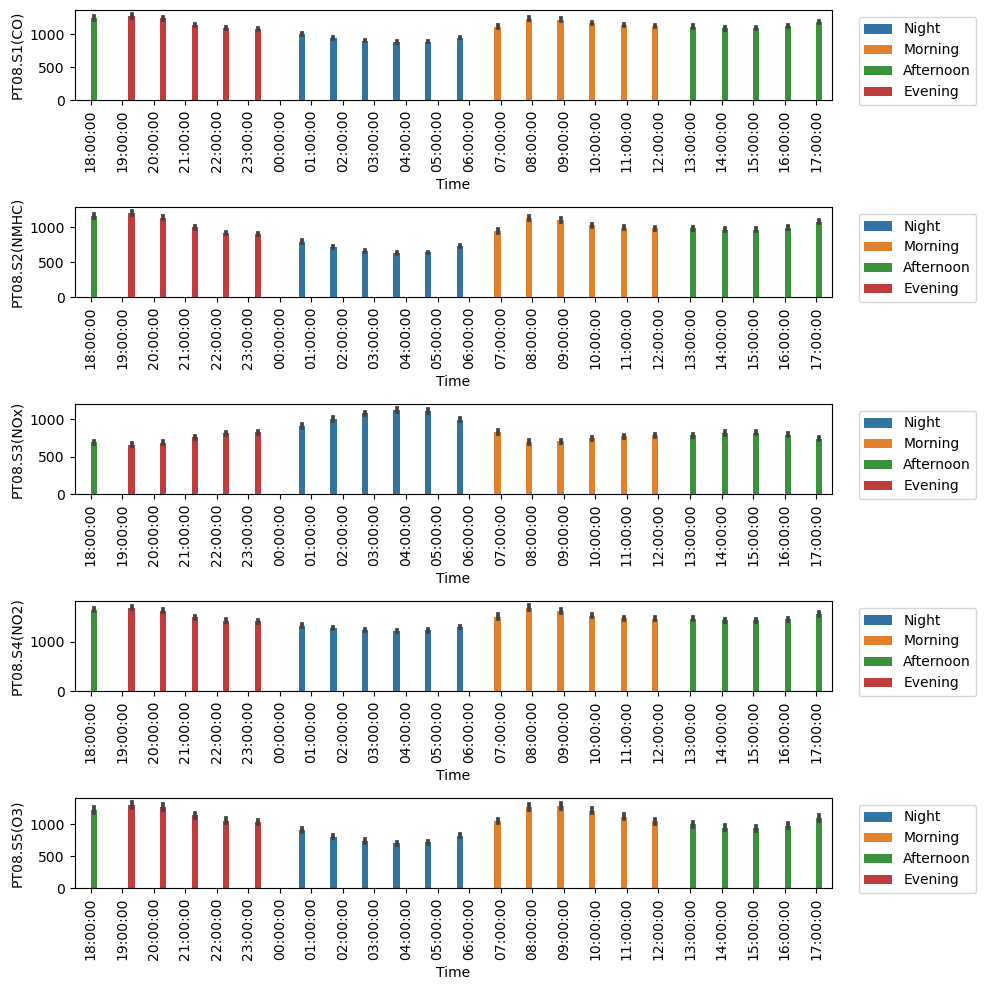

In [22]:
GT = ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
fig, ax = plt.subplots(5,1,figsize=(10,10))
# hue_order = ['Morning','Afternoon','Evening','Night']
for var, subplot in zip(GT,ax.flatten()):
    sns.barplot(x='Time', y=var,data = df, ax=subplot,hue = 'Time of Day')
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90) # rotate xtick labels
    subplot.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) 
fig.tight_layout()
plt.show()

#### Insights:
During night time NO_x content is huge in air

### Data Preprocessing

In [23]:
df.isnull().sum()

Date              114
Time              114
T                 480
RH                480
AH                480
PT08.S1(CO)       480
CO(GT)           1797
PT08.S2(NMHC)     480
PT08.S3(NOx)      480
NOx(GT)          1753
PT08.S4(NO2)      480
NO2(GT)          1756
PT08.S5(O3)       480
weekday             0
Time of Day       504
dtype: int64

In [24]:
df

Date      Time      T     RH    AH  PT08.S1(CO)  CO(GT)  \
0    2004-03-10  18:00:00 13.600 48.900 0.758     1360.000   2.600   
1    2004-03-10  19:00:00 13.300 47.700 0.726     1292.000   2.000   
2    2004-03-10  20:00:00 11.900 54.000 0.750     1402.000   2.200   
3    2004-03-10  21:00:00 11.000 60.000 0.787     1376.000   2.200   
4    2004-03-10  22:00:00 11.200 59.600 0.789     1272.000   1.600   
...         ...       ...    ...    ...   ...          ...     ...   
9466        NaT       NaT    NaN    NaN   NaN          NaN     NaN   
9467        NaT       NaT    NaN    NaN   NaN          NaN     NaN   
9468        NaT       NaT    NaN    NaN   NaN          NaN     NaN   
9469        NaT       NaT    NaN    NaN   NaN          NaN     NaN   
9470        NaT       NaT    NaN    NaN   NaN          NaN     NaN   

      PT08.S2(NMHC)  PT08.S3(NOx)  NOx(GT)  PT08.S4(NO2)  NO2(GT)  \
0          1046.000      1056.000  166.000      1692.000  113.000   
1           955.000      1174.000  103.000      1559.000   92.000   
2           939.000      1140.000  131.000      1555.000  114.000   
3           948.000      1092.000  172.000      1584.000  122.000   
4           836.000      1205.000  131.000      1490.000  116.000   
...             ...           ...      ...           ...      ...   
9466            NaN           NaN      NaN           NaN      NaN   
9467            NaN           NaN      NaN           NaN      NaN   
9468            NaN           NaN      NaN           NaN      NaN   
9469            NaN           NaN      NaN           NaN      NaN   
9470            NaN           NaN      NaN           NaN      NaN   

      PT08.S5(O3)  weekday Time of Day  
0        1268.000  weekday   Afternoon  
1         972.000  weekday     Evening  
2        1074.000  weekday     Evening  
3        1203.000  weekday     Evening  
4        1110.000  weekday     Evening  
...           ...      ...         ...  
9466          NaN  weekday         NaN  
9467          NaN  weekday         NaN  
9468          NaN  weekday         NaN  
9469          NaN  weekday         NaN  
9470          NaN  weekday         NaN  

[9471 rows x 15 columns]

In [25]:
# Check for duplicates
dups = df.duplicated()
print(dups.any())

True


In [26]:
#Remove duplicates
df.drop_duplicates().reset_index(drop = True)

Date      Time      T     RH    AH  PT08.S1(CO)  CO(GT)  \
0    2004-03-10  18:00:00 13.600 48.900 0.758     1360.000   2.600   
1    2004-03-10  19:00:00 13.300 47.700 0.726     1292.000   2.000   
2    2004-03-10  20:00:00 11.900 54.000 0.750     1402.000   2.200   
3    2004-03-10  21:00:00 11.000 60.000 0.787     1376.000   2.200   
4    2004-03-10  22:00:00 11.200 59.600 0.789     1272.000   1.600   
...         ...       ...    ...    ...   ...          ...     ...   
9353 2005-04-04  11:00:00 24.300 23.700 0.712     1163.000   2.400   
9354 2005-04-04  12:00:00 26.900 18.300 0.641     1142.000   2.400   
9355 2005-04-04  13:00:00 28.300 13.500 0.514     1003.000   2.100   
9356 2005-04-04  14:00:00 28.500 13.100 0.503     1071.000   2.200   
9357        NaT       NaT    NaN    NaN   NaN          NaN     NaN   

      PT08.S2(NMHC)  PT08.S3(NOx)  NOx(GT)  PT08.S4(NO2)  NO2(GT)  \
0          1046.000      1056.000  166.000      1692.000  113.000   
1           955.000      1174.000  103.000      1559.000   92.000   
2           939.000      1140.000  131.000      1555.000  114.000   
3           948.000      1092.000  172.000      1584.000  122.000   
4           836.000      1205.000  131.000      1490.000  116.000   
...             ...           ...      ...           ...      ...   
9353       1027.000       604.000  353.000      1264.000  179.000   
9354       1063.000       603.000  293.000      1241.000  175.000   
9355        961.000       702.000  235.000      1041.000  156.000   
9356       1047.000       654.000  265.000      1129.000  168.000   
9357            NaN           NaN      NaN           NaN      NaN   

      PT08.S5(O3)  weekday Time of Day  
0        1268.000  weekday   Afternoon  
1         972.000  weekday     Evening  
2        1074.000  weekday     Evening  
3        1203.000  weekday     Evening  
4        1110.000  weekday     Evening  
...           ...      ...         ...  
9353     1269.000  weekday     Morning  
9354     1092.000  weekday     Morning  
9355      770.000  weekday   Afternoon  
9356      816.000  weekday   Afternoon  
9357          NaN  weekday         NaN  

[9358 rows x 15 columns]

In [27]:
null_rows = df.isnull().all(axis=1)
df.drop(null_rows[null_rows].index,inplace=True)
    

In [28]:
# Handling missing values

df = df.apply(lambda column: column.interpolate(method = "linear") if column.dtype != 'datetime64[ns]' and column.dtype != '<m8[ns]' and column.dtype!='category' else column)

In [29]:
df.drop('Time of Day',axis=1,inplace=True)

In [30]:
df.isnull().sum()

Date             114
Time             114
T                  0
RH                 0
AH                 0
PT08.S1(CO)        0
CO(GT)             0
PT08.S2(NMHC)      0
PT08.S3(NOx)       0
NOx(GT)            0
PT08.S4(NO2)       0
NO2(GT)            0
PT08.S5(O3)        0
weekday            0
dtype: int64

In [31]:
# Handling outliers
stats = df.describe()

Q1 = stats.loc['25%',:]
Q3 = stats.loc['75%',:]

In [32]:
IQR = Q3 - Q1

In [33]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [34]:
lower_outliers = df[df.columns[2:13]]<lower_bound
upper_outliers = df[df.columns[2:13]]>upper_bound

df[df.columns[2:13]][(lower_outliers|upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T              2 non-null      float64
 1   RH             0 non-null      float64
 2   AH             3 non-null      float64
 3   PT08.S1(CO)    106 non-null    float64
 4   CO(GT)         224 non-null    float64
 5   PT08.S2(NMHC)  72 non-null     float64
 6   PT08.S3(NOx)   247 non-null    float64
 7   NOx(GT)        456 non-null    float64
 8   PT08.S4(NO2)   100 non-null    float64
 9   NO2(GT)        135 non-null    float64
 10  PT08.S5(O3)    75 non-null     float64
dtypes: float64(11)
memory usage: 814.0 KB


In [35]:
df = df[df.columns[2:13]].clip(lower = lower_bound, upper = upper_bound, axis = 1)

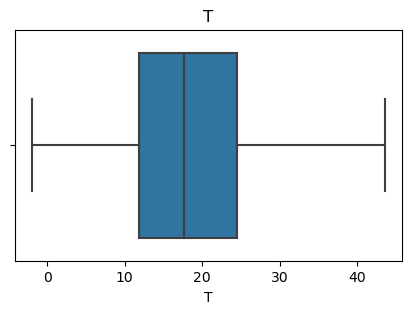

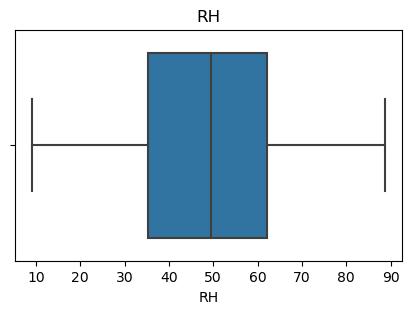

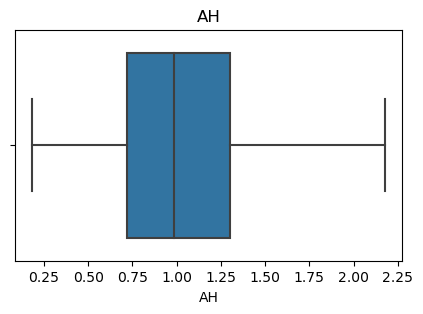

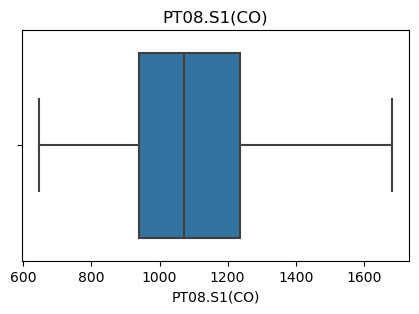

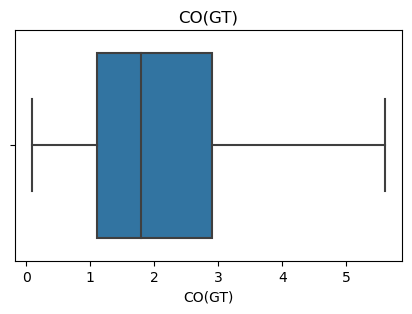

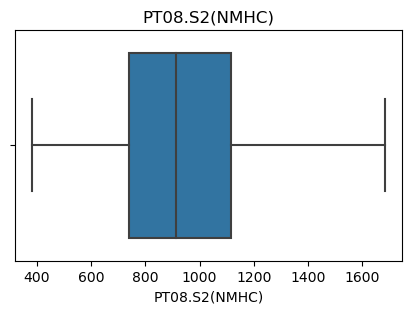

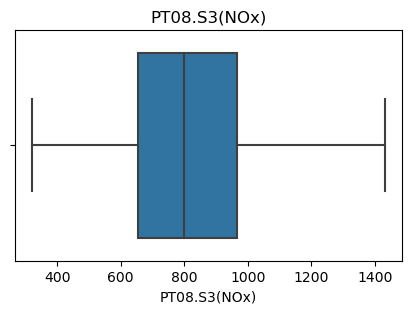

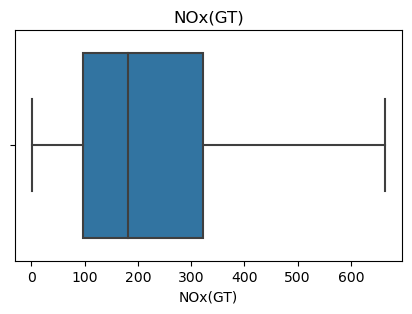

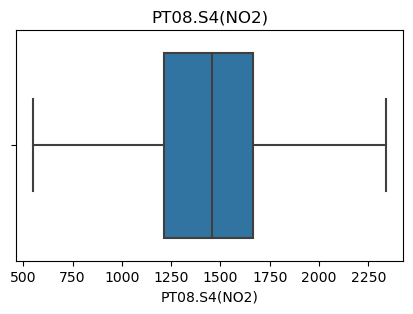

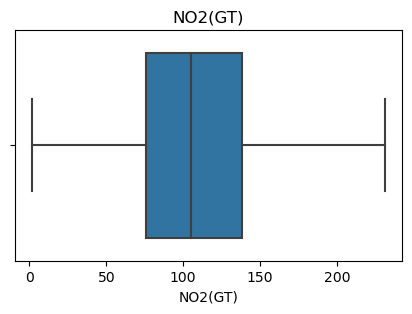

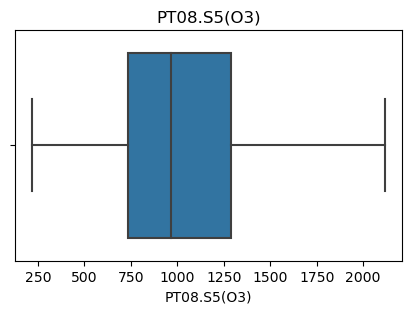

In [36]:
selected_columns = df.select_dtypes(include = [np.number]).columns
for col in selected_columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [38]:
df

T     RH     AH  PT08.S1(CO)  CO(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0    -0.541  0.008 -0.633        1.212   0.375          0.392         0.978   
1    -0.575 -0.060 -0.713        0.893  -0.077          0.047         1.478   
2    -0.734  0.299 -0.652        1.409   0.073         -0.014         1.334   
3    -0.836  0.641 -0.562        1.287   0.073          0.020         1.130   
4    -0.813  0.618 -0.556        0.799  -0.379         -0.404         1.609   
...     ...    ...    ...          ...     ...            ...           ...   
9466  1.153 -2.033 -1.265       -0.143   0.073          0.396        -0.724   
9467  1.153 -2.033 -1.265       -0.143   0.073          0.396        -0.724   
9468  1.153 -2.033 -1.265       -0.143   0.073          0.396        -0.724   
9469  1.153 -2.033 -1.265       -0.143   0.073          0.396        -0.724   
9470  1.153 -2.033 -1.265       -0.143   0.073          0.396        -0.724   

      NOx(GT)  PT08.S4(NO2)  NO2(GT)  PT08.S5(O3)  
0      -0.384         0.721    0.067        0.599  
1      -0.742         0.328   -0.395       -0.142  
2      -0.583         0.316    0.089        0.113  
3      -0.349         0.402    0.265        0.437  
4      -0.583         0.124    0.133        0.204  
...       ...           ...      ...          ...  
9466    0.180        -0.942    1.277       -0.533  
9467    0.180        -0.942    1.277       -0.533  
9468    0.180        -0.942    1.277       -0.533  
9469    0.180        -0.942    1.277       -0.533  
9470    0.180        -0.942    1.277       -0.533  

[9471 rows x 11 columns]

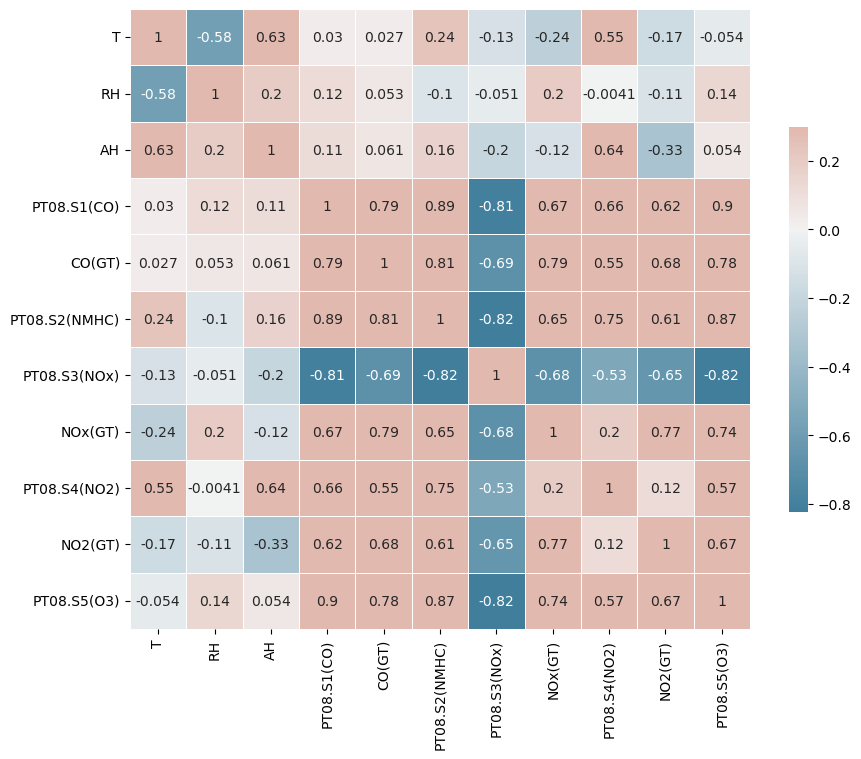

In [39]:
corr = df.corr()
# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### Insight:
- We could have one of the two features from PT08.S1(CO) and PT08.S5(O3) since they are highly positively correlated(0.9)
- PT08.S1(CO) also positively correlated with PT08.S2(NMHC)
- So we could remove PT08.S1(CO)

In [40]:
df.drop('PT08.S1(CO)',axis=1,inplace=True)

### Data Preparation

In [41]:
# Taking PT08.S1(CO) as target
dataset = df.copy()
from sklearn.model_selection import train_test_split

X = df.drop(['PT08.S2(NMHC)',],axis =1)
Y = df['PT08.S2(NMHC)']

In [42]:
# Feature Selection

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)

rf.fit(X,Y)

importance = rf.feature_importances_

print(importance)

[0.00480136 0.01906308 0.01273936 0.12634406 0.11418726 0.01440101
 0.10895077 0.0071618  0.59235131]


In [43]:
imp = {'feature':X.columns,'importance':importance}
importance_df = pd.DataFrame(imp)
importance_df

feature  importance
0             T       0.005
1            RH       0.019
2            AH       0.013
3        CO(GT)       0.126
4  PT08.S3(NOx)       0.114
5       NOx(GT)       0.014
6  PT08.S4(NO2)       0.109
7       NO2(GT)       0.007
8   PT08.S5(O3)       0.592

In [44]:
X = df.drop(['T','AH','NOx(GT)','NO2(GT)','PT08.S2(NMHC)'],axis=1)
y = df['PT08.S2(NMHC)']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)



RandomForestRegressor()

In [47]:
# Model Evaluation
from sklearn import metrics

pred = model.predict(X_test) 

print('R²={:.2f}'.format(metrics.r2_score(y_test, pred)))

R²=0.97


In [48]:
aux = pd.DataFrame()

aux['Y_test'] = y_test
aux['Predictions'] = pred
aux.shape[0]

1895

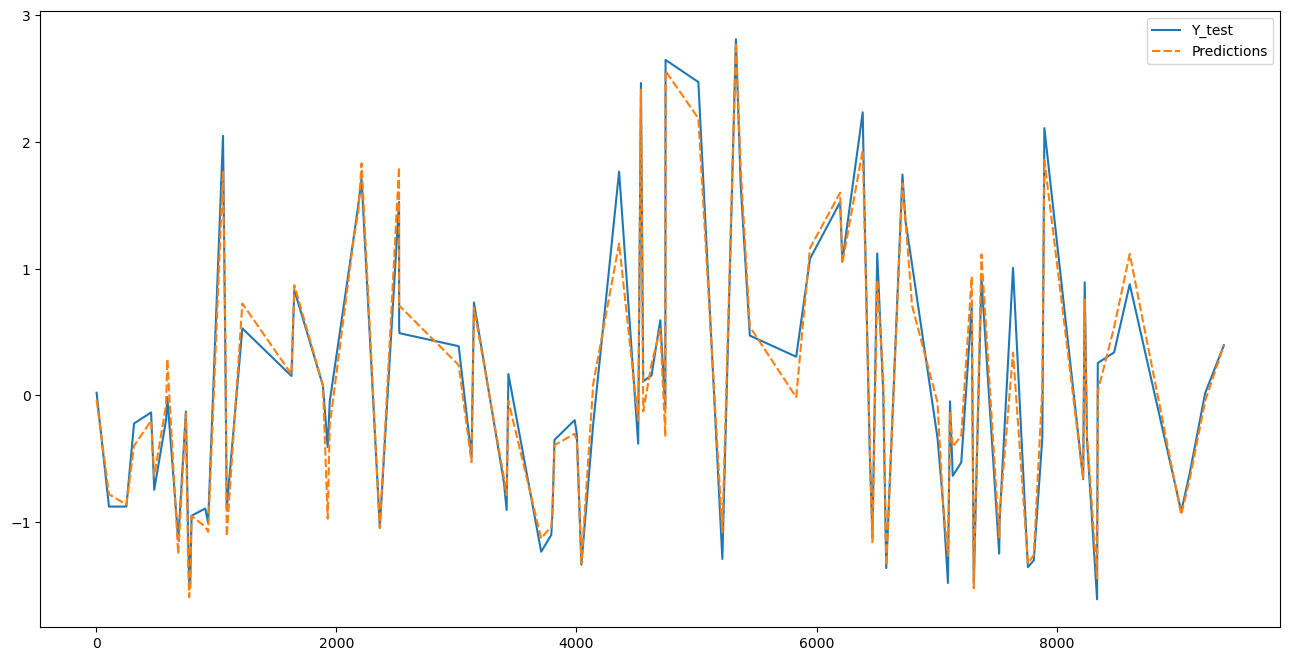

In [50]:
plt.figure(figsize=(16,8))
sns.lineplot(data=aux.iloc[:100,:])
plt.show()